## Questions to Answer


The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


df = pd.read_csv('Data/df_2002-2014_no_2007.csv.gz', low_memory=False)
df.head()

,imdb_id,budget,revenue,title,certification
0,tt0096056,0.0,0.0,Crime and Punishment,NaN
1,tt0118926,0.0,5227348.0,The Dancer Upstairs,R
2,tt0119980,0.0,0.0,Random Shooting in LA,NaN
3,tt0120679,12000000.0,56298474.0,Frida,R
4,tt0120804,33000000.0,102984862.0,Resident Evil,R


In [14]:
df.dropna(subset=['certification'], inplace=True)
df.isna().sum()

imdb_id          0
budget           0
revenue          0
title            0
certification    0
dtype: int64

In [16]:
df['certification'].value_counts()

R                                  3509
PG-13                              1863
NR                                 1646
PG                                  802
G                                   252
NC-17                                91
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
12                                    1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

change cert to just the certs you want

In [15]:
filter_ = df['certification'] == 'R' | 'PG' | 'PG-13' | 'G'
filter_

TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [ ]:
filt = (sales_df ['area'] == 'North')
sales_df[filt]

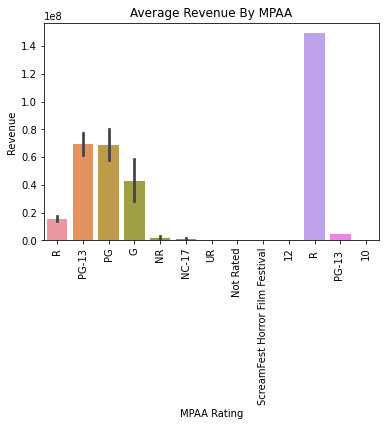

In [5]:
sns.barplot(data=df, x='certification', y= 'revenue')
plt.xticks(rotation = 90)
plt.title('Average Revenue By MPAA')
plt.xlabel('MPAA Rating')
plt.ylabel('Revenue');

Null Hypothesis:  Different MPAA Ratings all have the same results.

Alternative Hypothesis: Different MPAA Ratings have different Revenues. 

Using an alpha=.05

In [7]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys([nan, 'R', 'PG-13', 'PG', 'G', 'NR', 'NC-17', 'UR', 'Not Rated', 'ScreamFest Horror Film Festival', '12', 'R ', 'PG-13 ', '10'])

## Testing Assumptions
Assumption of normality

In [11]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

C:\Users\fid24\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1051: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
C:\Users\fid24\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\fid24\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fid24\anaconda3\envs\dojo-env\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [10]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

NameError: name 'norm_results_df' is not defined